In [1]:
import mne
from datahandling import BcomMEG
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# dir = '/Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_ANALYZED/EVOKED/DATA/WITHOUT_BADS/COVERT'
# # participants = ['BCOM_01', 'BCOM_02', 'BCOM_03', 'BCOM_04']
# participants = subject_list
# trials = [participant + '_2' for participant in participants] + [participant + '_3' for participant in participants] + [participant + '_4' for participant in participants]
# avoid_reading = False
# avoid_producing = True
# data = BcomMEG(dir=dir, subjects=trials, avoid_reading=avoid_reading, avoid_producing=avoid_producing) #8min as 12 seconds for Covert Reading. 
# data_covert_producing = BcomMEG(dir=dir, subjects=trials, avoid_reading=True, avoid_producing=False) # 12m 11s for Covert Producing

In [148]:
import pickle
# with open('subject_list.pkl', 'rb') as f:
#     subject_list = pickle.load(f)

with open("all_covert_reading.pkl", 'rb') as f:
    data = pickle.load(f)

# with open("all_covert_producing.pkl", 'rb') as f:
#     data_covert_producing = pickle.load(f) 

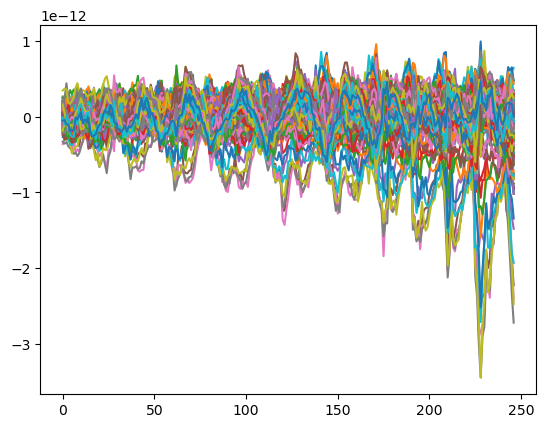

In [6]:
plt.plot(data.data['BCOM_01_4']['a_12'][0].get_data().squeeze())
plt.show()

In [26]:
epochs = []
for subject in data.data:
    for epoch in data.data[subject]:
        epochs.append(mne.concatenate_epochs([data.data[subject][epoch]]))

epochs = mne.concatenate_epochs(epochs, on_mismatch='ignore') #1min43 seconds Covert Reading (12k events)

sample = data.data['BCOM_01_2']['a_12'].copy()
sample_0_500 = data.data['BCOM_01_2']['a_12'].copy()
sample_m300_500 = data.data['BCOM_01_2']['a_12'].copy()
sample_m300_0 = data.data['BCOM_01_2']['a_12'].copy()
sample.info['ch_names']
sensors = []

del data

epochs_covert_producing = []
for subject in data_covert_producing.data:
    for epoch in data_covert_producing.data[subject]:
        epochs_covert_producing.append(mne.concatenate_epochs([data_covert_producing.data[subject][epoch]]))

epochs_covert_producing = mne.concatenate_epochs(epochs_covert_producing, on_mismatch='ignore') #2m15 seconds Covert Reading (12k422 events)

prod_sample = data_covert_producing.data['BCOM_01_2']['a_112'].copy()
prod_sample_0_500 = data_covert_producing.data['BCOM_01_2']['a_112'].copy()
prod_sample_m300_500 = data_covert_producing.data['BCOM_01_2']['a_112'].copy()
prod_sample_m300_0 = data_covert_producing.data['BCOM_01_2']['a_112'].copy()
prod_sample.info['ch_names']
prod_sensors = []

del data_covert_producing

        

Not setting metadata
8 matching events found
No baseline correction applied
Not setting metadata
13 matching events found
No baseline correction applied
Not setting metadata
11 matching events found
No baseline correction applied
Not setting metadata
12 matching events found
No baseline correction applied
Not setting metadata
13 matching events found
No baseline correction applied
Not setting metadata
11 matching events found
No baseline correction applied
Not setting metadata
10 matching events found
No baseline correction applied
Not setting metadata
12 matching events found
No baseline correction applied
Not setting metadata
18 matching events found
No baseline correction applied
Not setting metadata
12 matching events found
No baseline correction applied
Not setting metadata
16 matching events found
No baseline correction applied
Not setting metadata
14 matching events found
No baseline correction applied
Not setting metadata
12 matching events found
No baseline correction applied


In [6]:
data_covert_producing

NameError: name 'data_covert_producing' is not defined

In [32]:
# 9min 33 seconds - run only when you have to.

pre_crop = epochs.copy().crop(tmin=-0.3, tmax=0)
averaged_pre = pre_crop.average().get_data()
del pre_crop
print("done with reading pre-crop")

post_crop = epochs.copy().crop(tmin=0, tmax=0.5)
averaged_post = post_crop.average().get_data()
del post_crop
print("done with reading post-crop")

averaged_full = epochs.average().get_data()
del epochs
print("done with reading full crop")

prod_pre_crop = epochs_covert_producing.copy().crop(tmin=-0.3, tmax=0)
prod_averaged_pre = prod_pre_crop.average().get_data()
del prod_pre_crop
print("done with prod pre-crop")

prod_post_crop = epochs_covert_producing.copy().crop(tmin=0, tmax=0.5)
prod_averaged_post = prod_post_crop.average().get_data()
del prod_post_crop
print("done with prod post-crop")

prod_averaged_full = epochs_covert_producing.average().get_data()
del epochs_covert_producing

# Save the objects
with open('averaged_data.pkl', 'wb') as f:
    pickle.dump({
        'averaged_pre': averaged_pre,
        'averaged_post': averaged_post,
        'averaged_full': averaged_full,
        'prod_averaged_pre': prod_averaged_pre,
        'prod_averaged_post': prod_averaged_post,
        'prod_averaged_full': prod_averaged_full
    }, f)
    # To open only the 'averaged_full' data

print("done with saving averaged data")
print("done with prod full")


done with saving averaged data
done with prod full


In [156]:
with open('averaged_data.pkl', 'rb') as f:
    loaded_data = pickle.load(f)
prod_averaged_full = loaded_data['prod_averaged_full']


In [157]:
# absolute_avg_pre = abs(averaged_pre)
# absolute_avg_post = abs(averaged_post)
# absolute_avg_full = abs(averaged_full)

# prod_absolute_avg_pre = abs(prod_averaged_pre)
# prod_absolute_avg_post = abs(prod_averaged_post)
prod_absolute_avg_full = abs(prod_averaged_full)

In [158]:
#area under the curve
# auc_m300_0 = np.sum(absolute_avg_pre, axis=1)
# auc_0_500  = np.sum(absolute_avg_post, axis=1)
# auc_m300_500 = np.sum(absolute_avg_full, axis=1)


# prod_auc_m300_0 = np.sum(prod_absolute_avg_pre, axis=1)
# prod_auc_0_500 = np.sum(prod_absolute_avg_post, axis=1)
prod_auc_m300_500 = np.sum(prod_absolute_avg_full, axis=1)

array([225, 191, 209, 226, 208, 194, 245, 244, 195])

In [151]:
top_k = 9


In [149]:
##Covert Reading
# auc_sensor_map_0_500 = {i: j for i, j in enumerate(auc_0_500)}
# sorted_auc_sensor_map_0_500 = list(sorted(auc_sensor_map_0_500.items(), key=lambda item: item[1], reverse=True))[:top_k] # sort by largest area under the curve, descending
# sorted_auc_sensor_map_0_500 = ['0' + str(j[0]) if len(str(j[0])) < 3 else str(j[0]) for _, j in enumerate(sorted_auc_sensor_map_0_500)] # match MNE naming convention
# sensors_0_500 = []
# for k, l in enumerate(sample.info['ch_names']):
#     for i, j in enumerate(sorted_auc_sensor_map_0_500):
#         if l[4:] == j:
#             sensors_0_500.append(l)
# sample_0_500 = sample_0_500.pick(sensors_0_500)

# picks_0_500 = {}
sample = data.data['BCOM_01_2']['a_12'].copy()

# auc_sensor_map_m300_500 = {i: j for i, j in enumerate(auc_m300_500)}
# sorted_auc_sensor_map_m300_500 = list(sorted(auc_sensor_map_m300_500.items(), key=lambda item: item[1], reverse=True))[:top_k]
# sorted_auc_sensor_map_m300_500 = ['0' + str(j[0]) if len(str(j[0])) < 3 else str(j[0]) for _, j in enumerate(sorted_auc_sensor_map_m300_500)]
# sensors_m300_500 = []
# for k, l in enumerate(sample.info['ch_names']):
#     for i, j in enumerate(sorted_auc_sensor_map_m300_500):
#         if l[4:] == j:
#             sensors_m300_500.append(l)
# sample_m300_500.pick(sensors_m300_500)


# auc_sensor_map_m300_0 = {i: j for i, j in enumerate(auc_m300_0)}
# sorted_auc_sensor_map_m300_0 = list(sorted(auc_sensor_map_m300_0.items(), key=lambda item: item[1], reverse=True))[:top_k]
# sorted_auc_sensor_map_m300_0 = ['0' + str(j[0]) if len(str(j[0])) < 3 else str(j[0]) for _, j in enumerate(sorted_auc_sensor_map_m300_0)]
# sensors_m300_0 = []
# for k, l in enumerate(sample.info['ch_names']):
#     for i, j in enumerate(sorted_auc_sensor_map_m300_0):
#         if l[4:] == j:
#             sensors_m300_0.append(l)
# sample_m300_0 = sample_m300_0.pick(sensors_m300_0)



In [13]:
## Covert Production
prod_auc_sensor_map_0_500 = {i: j for i, j in enumerate(prod_auc_0_500)}
prod_sorted_auc_sensor_map_0_500 = list(sorted(prod_auc_sensor_map_0_500.items(), key=lambda item: item[1], reverse=True))[:top_k] # sort by largest area under the curve, descending
prod_sorted_auc_sensor_map_0_500 = ['0' + str(j[0]) if len(str(j[0])) < 3 else str(j[0]) for _, j in enumerate(prod_sorted_auc_sensor_map_0_500)] # match MNE naming convention
prod_sensors_0_500 = []
for k, l in enumerate(prod_sample.info['ch_names']):
    for i, j in enumerate(prod_sorted_auc_sensor_map_0_500):
        if l[4:] == j:
            prod_sensors_0_500.append(l)
prod_sample_0_500 = prod_sample_0_500.pick(prod_sensors_0_500)


prod_auc_sensor_map_m300_500 = {i: j for i, j in enumerate(prod_auc_m300_500)}
prod_sorted_auc_sensor_map_m300_500 = list(sorted(prod_auc_sensor_map_m300_500.items(), key=lambda item: item[1], reverse=True))[:top_k]
prod_sorted_auc_sensor_map_m300_500 = ['0' + str(j[0]) if len(str(j[0])) < 3 else str(j[0]) for _, j in enumerate(prod_sorted_auc_sensor_map_m300_500)]
prod_sensors_m300_500 = []
for k, l in enumerate(prod_sample.info['ch_names']):
    for i, j in enumerate(prod_sorted_auc_sensor_map_m300_500):
        if l[4:] == j:
            prod_sensors_m300_500.append(l)
prod_sample_m300_500.pick(prod_sensors_m300_500)


prod_auc_sensor_map_m300_0 = {i: j for i, j in enumerate(prod_auc_m300_0)}
prod_sorted_auc_sensor_map_m300_0 = list(sorted(prod_auc_sensor_map_m300_0.items(), key=lambda item: item[1], reverse=True))[:top_k]
prod_sorted_auc_sensor_map_m300_0 = ['0' + str(j[0]) if len(str(j[0])) < 3 else str(j[0]) for _, j in enumerate(prod_sorted_auc_sensor_map_m300_0)]
prod_sensors_m300_0 = []
for k, l in enumerate(prod_sample.info['ch_names']):
    for i, j in enumerate(prod_sorted_auc_sensor_map_m300_0):
        if l[4:] == j:
            prod_sensors_m300_0.append(l)
prod_sample_m300_0 = prod_sample_m300_0.pick(prod_sensors_m300_0)

In [14]:
ranking_300_0 = []
sizes_300_0 = []
for channel, _ in enumerate(sample_m300_0.info['chs']):
    ranking_300_0.append((np.where(np.array(sorted_auc_sensor_map_m300_0) == sample_m300_0.info['chs'][channel]['ch_name'][4:])[0][0]) + 1)
    sizes_300_0.append((np.where(np.array(sorted_auc_sensor_map_m300_0)[::-1] == sample_m300_0.info['chs'][channel]['ch_name'][4:])[0][0] + 1) * 50)

ranking_0_500 = []
sizes_0_500 = []
for channel, _ in enumerate(sample_0_500.info['chs']):
    ranking_0_500.append((np.where(np.array(sorted_auc_sensor_map_0_500) == sample_0_500.info['chs'][channel]['ch_name'][4:])[0][0]) + 1)
    sizes_0_500.append((np.where(np.array(sorted_auc_sensor_map_0_500)[::-1] == sample_0_500.info['chs'][channel]['ch_name'][4:])[0][0] + 1) * 50)

ranking_300_500 = []
sizes_300_500 = []
for channel, _ in enumerate(sample_m300_500.info['chs']):
    ranking_300_500.append((np.where(np.array(sorted_auc_sensor_map_m300_500) == sample_m300_500.info['chs'][channel]['ch_name'][4:])[0][0]) + 1)
    sizes_300_500.append((np.where(np.array(sorted_auc_sensor_map_m300_500)[::-1] == sample_m300_500.info['chs'][channel]['ch_name'][4:])[0][0] + 1) * 50)

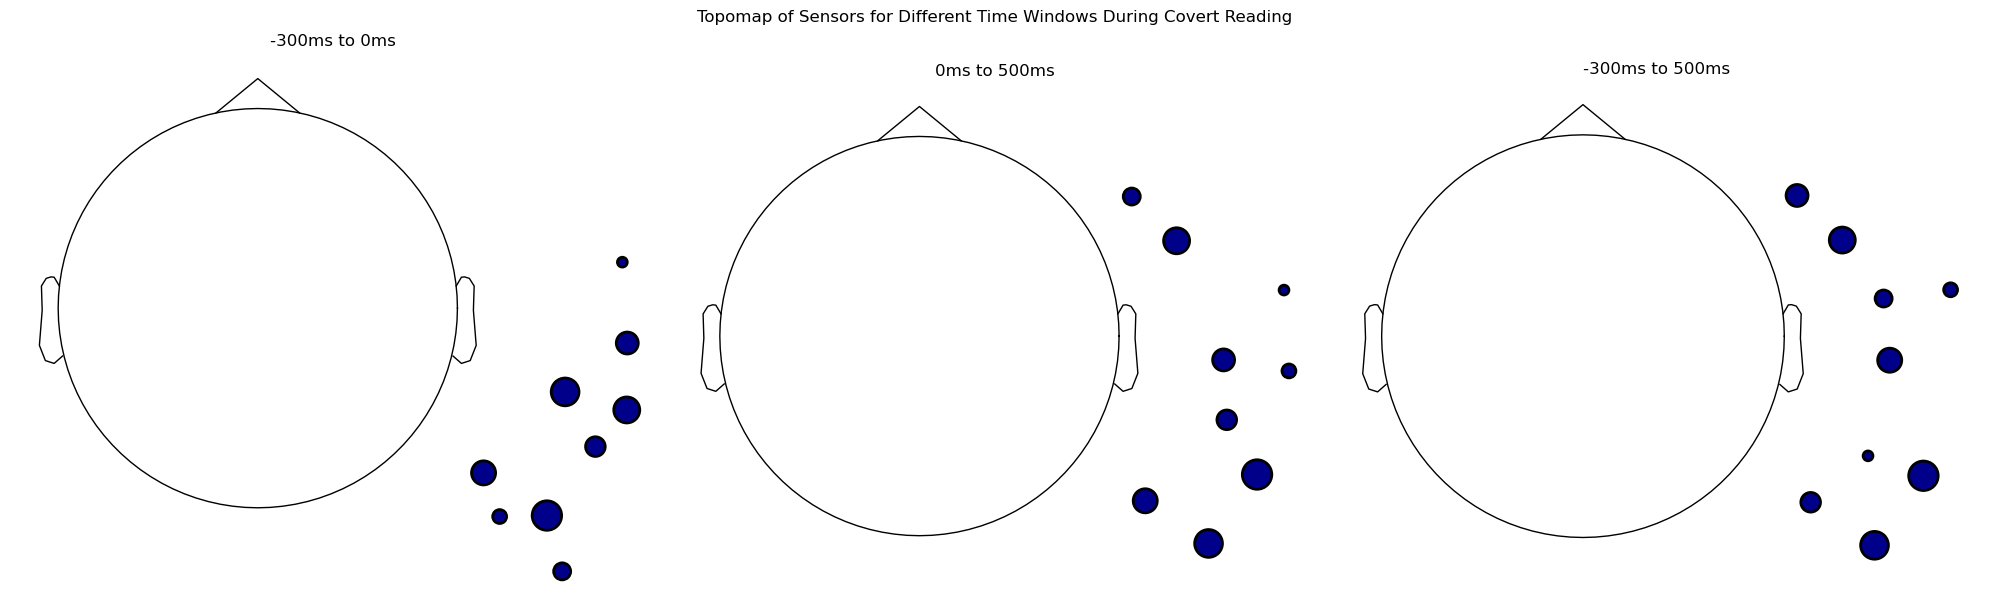

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(20,20))
mne.viz.plot_sensors(info=sample_m300_0.info, axes=ax[0], show=False, pointsize=sizes_300_0, cmap='viridis', show_names=False)
mne.viz.plot_sensors(info=sample_0_500.info, axes=ax[1], show=False, pointsize=sizes_0_500, cmap='viridis', show_names=False)
mne.viz.plot_sensors(info=sample_m300_500.info, axes=ax[2], show=False, pointsize=sizes_300_500, cmap='viridis', show_names=False)
ax[0].set_title("-300ms to 0ms")
ax[1].set_title("0ms to 500ms")
ax[2].set_title("-300ms to 500ms")
fig.suptitle('Topomap of Sensors for Different Time Windows During Covert Reading', y=0.65)
fig.tight_layout()
plt.show()


In [16]:
prod_ranking_300_0 = []
prod_sizes_300_0 = []
for channel, _ in enumerate(prod_sample_m300_0.info['chs']):
    prod_ranking_300_0.append((np.where(np.array(prod_sorted_auc_sensor_map_m300_0) == prod_sample_m300_0.info['chs'][channel]['ch_name'][4:])[0][0]) + 1)
    prod_sizes_300_0.append((np.where(np.array(prod_sorted_auc_sensor_map_m300_0)[::-1] == prod_sample_m300_0.info['chs'][channel]['ch_name'][4:])[0][0] + 1) * 50)

prod_ranking_0_500 = []
prod_sizes_0_500 = []
for channel, _ in enumerate(prod_sample_0_500.info['chs']):
    prod_ranking_0_500.append((np.where(np.array(prod_sorted_auc_sensor_map_0_500) == prod_sample_0_500.info['chs'][channel]['ch_name'][4:])[0][0]) + 1)
    prod_sizes_0_500.append((np.where(np.array(prod_sorted_auc_sensor_map_0_500)[::-1] == prod_sample_0_500.info['chs'][channel]['ch_name'][4:])[0][0] + 1) * 50)

prod_ranking_300_500 = []
prod_sizes_300_500 = []
for channel, _ in enumerate(prod_sample_m300_500.info['chs']):
    prod_ranking_300_500.append((np.where(np.array(prod_sorted_auc_sensor_map_m300_500) == prod_sample_m300_500.info['chs'][channel]['ch_name'][4:])[0][0]) + 1)
    prod_sizes_300_500.append((np.where(np.array(prod_sorted_auc_sensor_map_m300_500)[::-1] == prod_sample_m300_500.info['chs'][channel]['ch_name'][4:])[0][0] + 1) * 50)

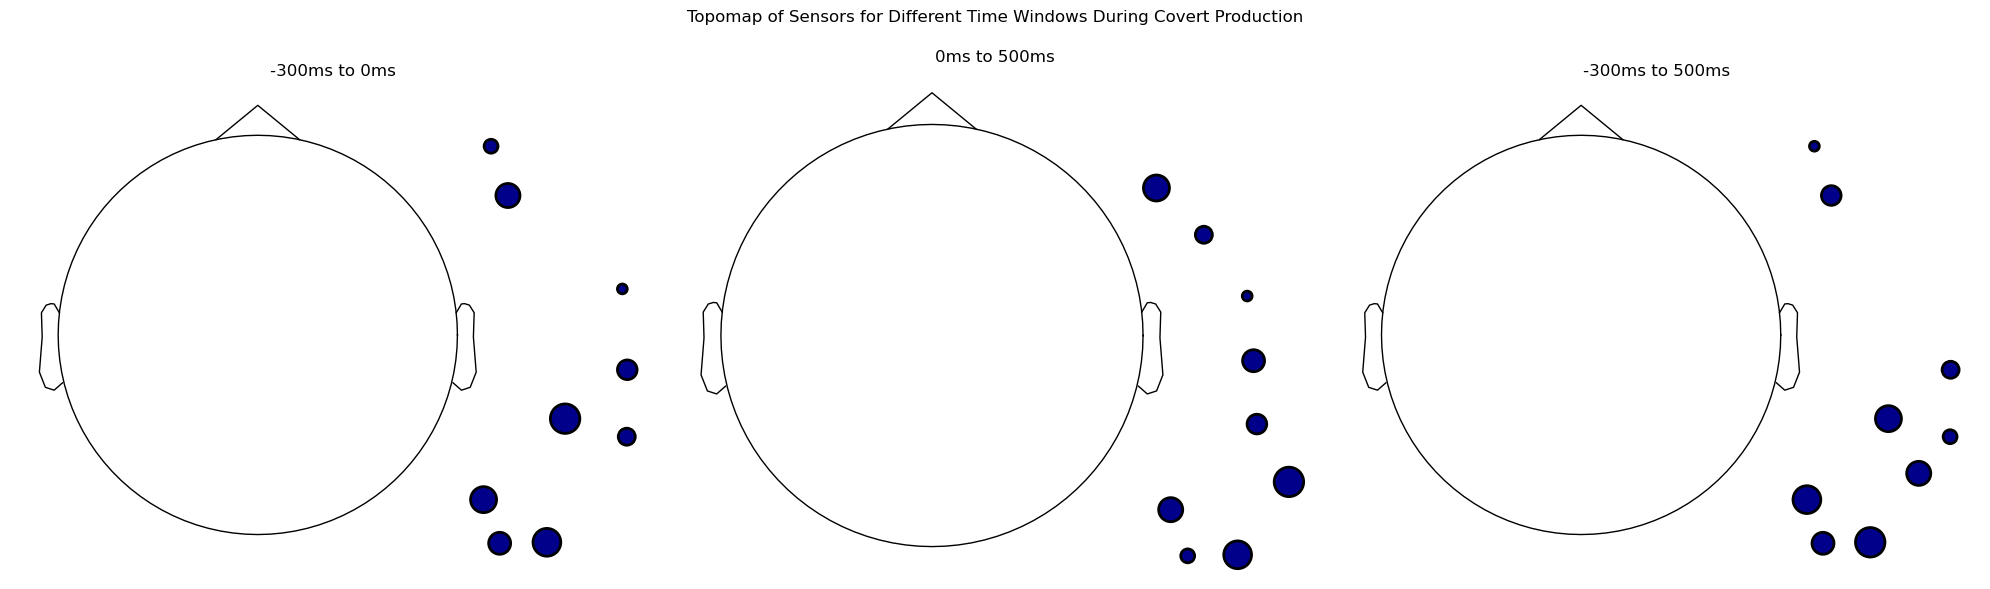

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(20,20))
mne.viz.plot_sensors(info=prod_sample_m300_0.info, axes=ax[0], show=False, pointsize=prod_sizes_300_0, cmap='viridis', show_names=False)
mne.viz.plot_sensors(info=prod_sample_0_500.info, axes=ax[1], show=False, pointsize=prod_sizes_0_500, cmap='viridis', show_names=False)
mne.viz.plot_sensors(info=prod_sample_m300_500.info, axes=ax[2], show=False, pointsize=prod_sizes_300_500, cmap='viridis', show_names=False)
ax[0].set_title("-300ms to 0ms")
ax[1].set_title("0ms to 500ms")
ax[2].set_title("-300ms to 500ms")
fig.suptitle('Topomap of Sensors for Different Time Windows During Covert Production', y=0.65)
fig.tight_layout()
plt.show()

## try with mne.grand_average, i.e, no full merge

In [134]:
import pickle

with open("all_covert_reading.pkl", 'rb') as f:
    data = pickle.load(f)

all_subject_epochs = []
for subject in data.data:
    subject_data = []
    for epoch in data.data[subject]:
        subject_data.append(data.data[subject][epoch])
    all_subject_epochs.append(mne.concatenate_epochs(subject_data))


Not setting metadata
196 matching events found
No baseline correction applied
Not setting metadata
201 matching events found
No baseline correction applied
Not setting metadata
194 matching events found
No baseline correction applied
Not setting metadata
205 matching events found
No baseline correction applied
Not setting metadata
194 matching events found
No baseline correction applied
Not setting metadata
206 matching events found
No baseline correction applied
Not setting metadata
207 matching events found
No baseline correction applied
Not setting metadata
207 matching events found
No baseline correction applied
Not setting metadata
207 matching events found
No baseline correction applied
Not setting metadata
205 matching events found
No baseline correction applied
Not setting metadata
181 matching events found
No baseline correction applied
Not setting metadata
202 matching events found
No baseline correction applied
Not setting metadata
199 matching events found
No baseline corre

In [135]:
all_evoked = [epo.crop(tmin=-0.3, tmax=0.0).average() for epo in all_subject_epochs]
grand_average = mne.grand_average(all_evoked)

Identifying common channels ...


In [139]:
all_evoked[0].info['ch_names'][209]

'MEG 211'

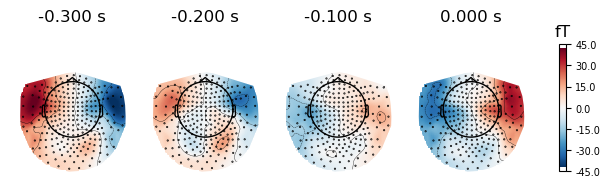

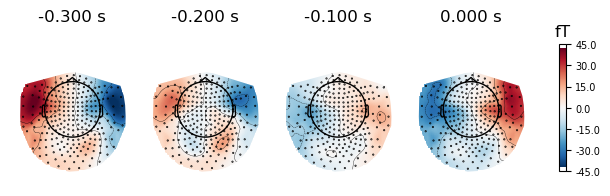

In [118]:
grand_average.plot_topomap()

In [136]:
absac = (np.sum(abs(grand_average.data), axis=1))

In [106]:
sensor_map = [f"MEG {channel}" for channel in top_9_channels]

2.3423176484618543e-12

In [132]:
x = [55, 0, 4, 1]
np.argsort(x)[-4:][::-1]

array([0, 2, 3, 1])

In [133]:
all_evoked[0].info

<Info | 13 non-empty values
 bads: []
 ch_names: MEG 209, MEG 225, MEG 191, MEG 194, MEG 208, MEG 245, MEG 244, ...
 chs: 9 Magnetometers
 ctf_head_t: CTF/4D/KIT head -> head transform
 custom_ref_applied: False
 dev_ctf_t: CTF MEG device -> CTF/4D/KIT head transform
 dev_head_t: MEG device -> head transform
 dig: 896 items (3 Cardinal, 893 Extra)
 file_id: 4 items (dict)
 highpass: 0.5 Hz
 lowpass: 150.0 Hz
 meas_date: 2019-04-19 10:01:06 UTC
 meas_id: 4 items (dict)
 nchan: 9
 projs: []
 sfreq: 300.0 Hz
>

In [ ]:
top_9_channels = np.argsort(absac)[-9:][::-1]
names = top_9_channels

# ranking_300_0 = []
# sizes_300_0 = []
# for channel, _ in enumerate(sample_m300_0.info['chs']):
#     ranking_300_0.append((np.where(np.array(sorted_auc_sensor_map_m300_0) == sample_m300_0.info['chs'][channel]['ch_name'][4:])[0][0]) + 1)
#     sizes_300_0.append((np.where(np.array(sorted_auc_sensor_map_m300_0)[::-1] == sample_m300_0.info['chs'][channel]['ch_name'][4:])[0][0] + 1) * 50)

# picks = []
# for i in top_9_channels:
#     picks.append(all_evoked[0].info['ch_names'][i])

In [109]:
sample = all_evoked[0].pick(sensor_map)

In [111]:
sample.info['ch_names']

['MEG 209',
 'MEG 225',
 'MEG 191',
 'MEG 194',
 'MEG 208',
 'MEG 245',
 'MEG 244',
 'MEG 195',
 'MEG 246']

In [174]:
np.argsort(prod_auc_m300_500)[-top_k:][::-1]
channels_manual = [data.data['BCOM_01_4']['a_12'].info['ch_names'][i] for i in np.argsort(prod_auc_m300_500)[-top_k:][::-1]]
channels_manual

['MEG 227',
 'MEG 193',
 'MEG 211',
 'MEG 228',
 'MEG 210',
 'MEG 196',
 'MEG 247',
 'MEG 246',
 'MEG 197']

In [91]:
sample = all_evoked[0].pick(picks)

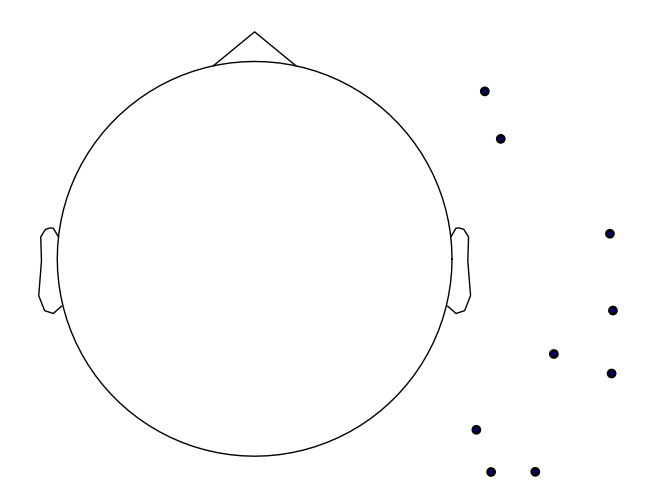

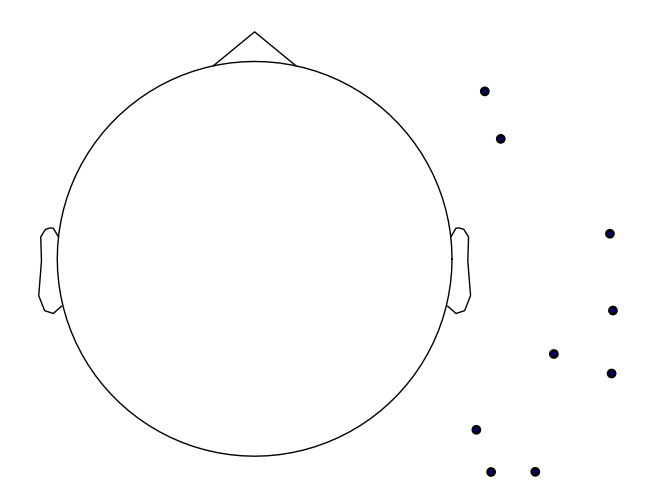

In [112]:
mne.viz.plot_sensors(info=sample.info, show=False, cmap='viridis', show_names=False)